# Creating and Backtesting SMA Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


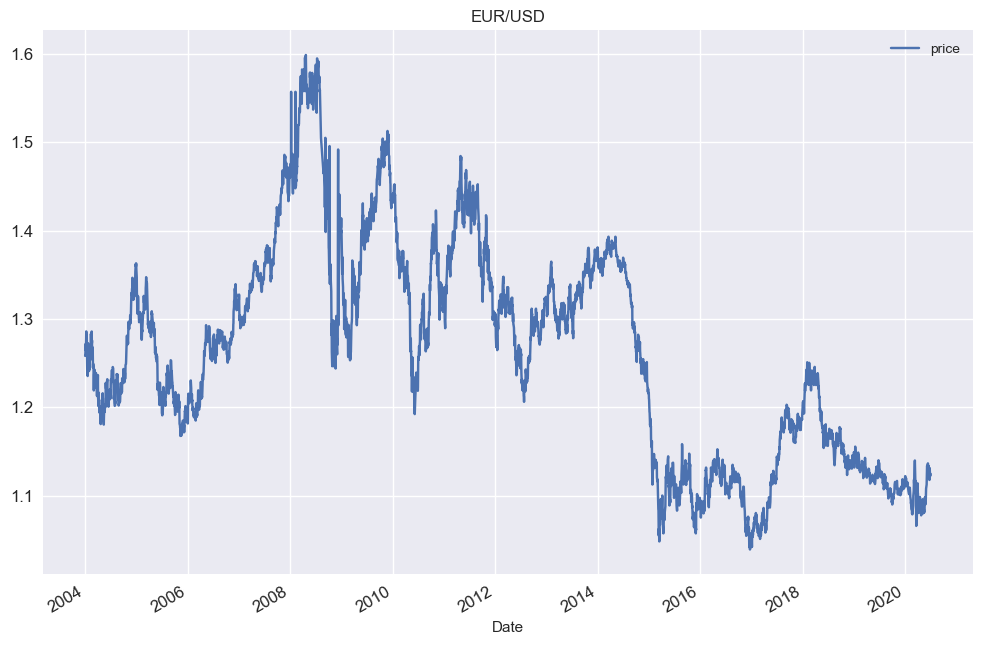

In [5]:
df.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [6]:
df["returns"] = np.log(df.div(df.shift(1)))

In [7]:
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


## A simple Buy and Hold "Strategy"

In [8]:
df.dropna(inplace = True)

In [9]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


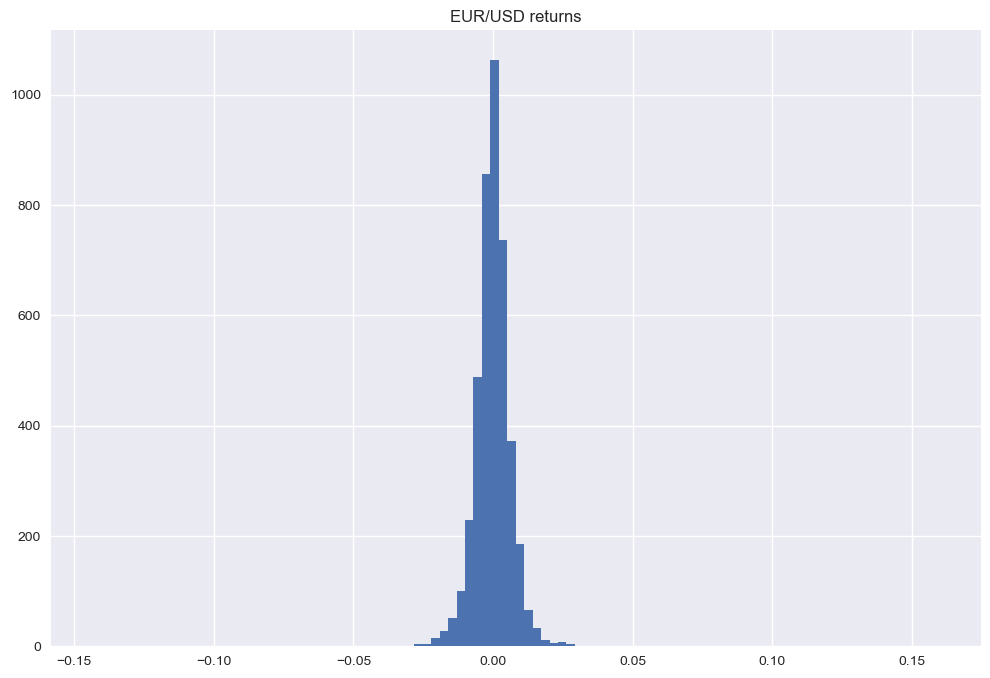

In [10]:
df.returns.hist(bins = 100, figsize = (12, 8))
plt.title("EUR/USD returns")
plt.show()

In [11]:
df.returns.sum()

-0.11214302770699758

In [12]:
np.exp(df.returns.sum())
# We invested $1 and after 16 years we end at $0.89

0.8939163935445148

In [13]:
df.price[-1] / df.price[0]
# Last Price / First Price

0.8939163935445141

In [14]:
df.returns.cumsum().apply(np.exp)

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [15]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [16]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


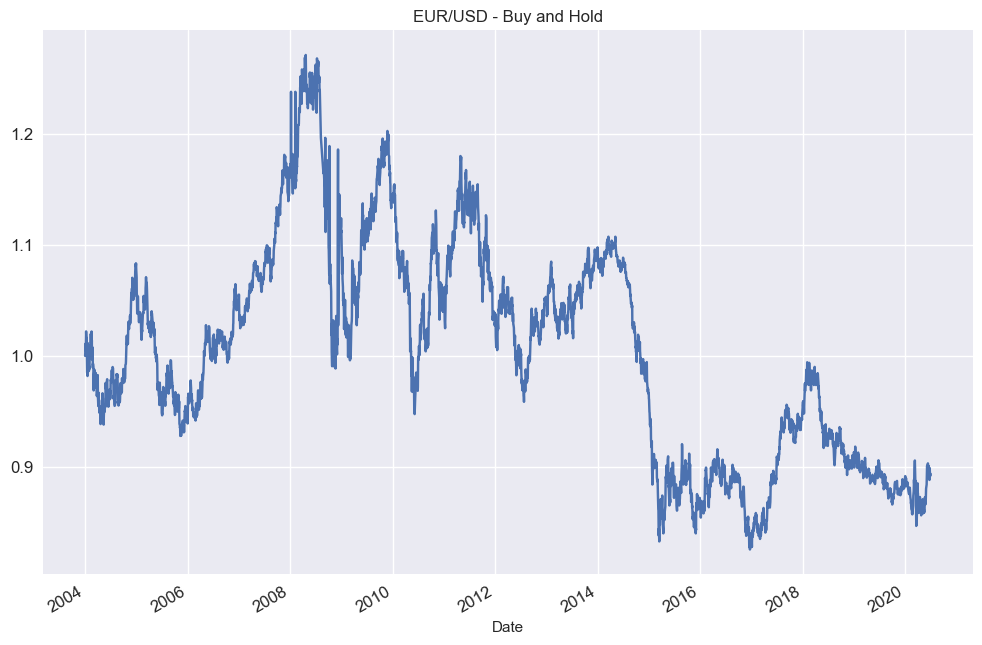

In [17]:
df.creturns.plot(figsize = (12, 8), title = "EUR/USD - Buy and Hold", fontsize = 12)
plt.show()

## More Performance Metrics

In [18]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [19]:
df.creturns.iloc[-1] # absolute Performance 

0.8939163935445149

In [20]:
df.returns.sum() # absolute Performance

-0.11214302770699758

In [21]:
df.describe()

,price,returns,creturns
count,4274.000000,4274.000000,4274.000000
mean,1.262336,-0.000026,1.003292
std,0.122233,0.007593,0.097150
min,1.039047,-0.143324,0.825824
25%,1.145548,-0.003370,0.910470
50%,1.269205,0.000000,1.008751
75%,1.348909,0.003361,1.072099
max,1.598798,0.159632,1.270709


__annualized mean return and risk__

In [22]:
df.returns.mean() * 252 # mean return

-0.006612083056191715

In [23]:
df.returns.std() * np.sqrt(252) # risk

0.12054120479431393

__Maximum drawdown__

In [24]:
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


In [25]:
import pandas as pd

# Example DataFrame
df1 = pd.DataFrame({'A': [1, 2, 3, 2, 5]})

# Using cummax() on the DataFrame
cumulative_max = df1.cummax()

print(cumulative_max)

   A
0  1
1  2
2  3
3  3
4  5


In [26]:
df["cummax"] = df.creturns.cummax()

In [27]:
df

,price,returns,creturns,cummax
Date,,,,
2004-01-02,1.258194,0.000000,1.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348,1.008348
2004-01-06,1.272103,0.002681,1.011055,1.011055
2004-01-07,1.264095,-0.006315,1.004690,1.011055
2004-01-08,1.277498,0.010547,1.015343,1.015343
...,...,...,...,...
2020-06-24,1.131235,0.002892,0.899094,1.270709
2020-06-25,1.125087,-0.005449,0.894208,1.270709
2020-06-26,1.122208,-0.002562,0.891920,1.270709


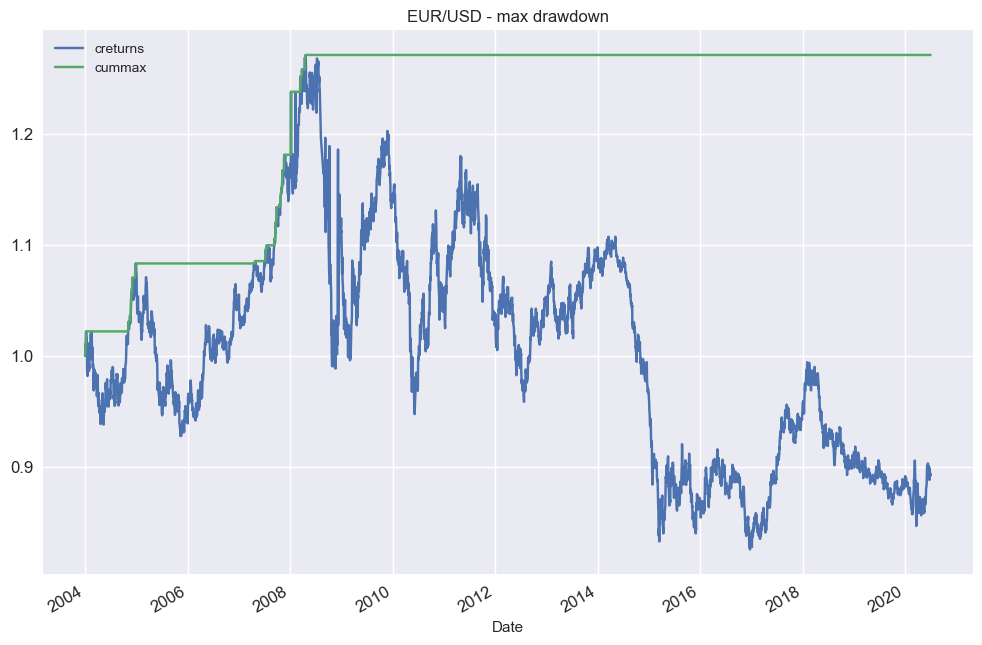

In [28]:
df[["creturns", "cummax"]].dropna().plot(figsize = (12, 8), title = "EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [29]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [30]:
drawdown.max() # maximum drawdown

0.4448840569933439

In [31]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')

## Defining an SMA Crossover Strategy

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [33]:
data = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [34]:
data

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [35]:
sma_s = 46
sma_l = 137

In [36]:
data.price.rolling(50).mean()

Date
2004-01-01         NaN
2004-01-02         NaN
2004-01-05         NaN
2004-01-06         NaN
2004-01-07         NaN
                ...   
2020-06-24    1.101794
2020-06-25    1.102486
2020-06-26    1.103213
2020-06-29    1.103931
2020-06-30    1.104695
Name: price, Length: 4275, dtype: float64

In [37]:
data["SMA_S"] = data.price.rolling(sma_s).mean()

In [38]:
data["SMA_L"] = data.price.rolling(sma_l).mean()

In [39]:
data

,price,SMA_S,SMA_L
Date,,,
2004-01-01,1.258194,NaN,NaN
2004-01-02,1.258194,NaN,NaN
2004-01-05,1.268698,NaN,NaN
2004-01-06,1.272103,NaN,NaN
2004-01-07,1.264095,NaN,NaN
...,...,...,...
2020-06-24,1.131235,1.103047,1.102654
2020-06-25,1.125087,1.103905,1.102737
2020-06-26,1.122208,1.104801,1.102788


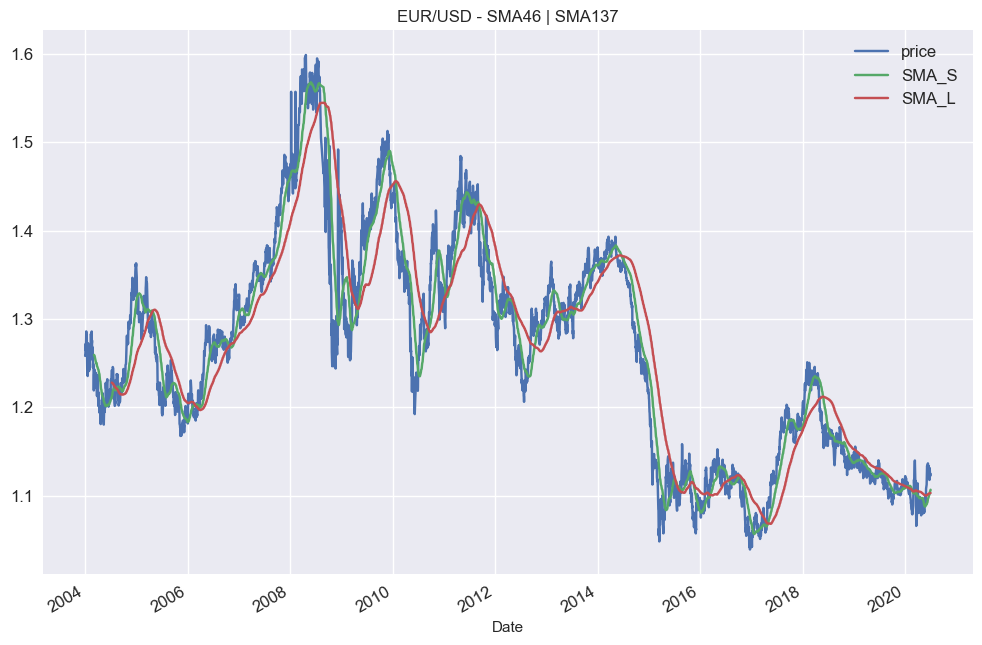

In [40]:
data.plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [41]:
data.dropna(inplace = True)

In [42]:
data

,price,SMA_S,SMA_L
Date,,,
2004-07-09,1.241897,1.212185,1.227891
2004-07-12,1.240803,1.213333,1.227764
2004-07-13,1.233304,1.214392,1.227583
2004-07-14,1.238497,1.215486,1.227362
2004-07-15,1.235605,1.216466,1.227096
...,...,...,...
2020-06-24,1.131235,1.103047,1.102654
2020-06-25,1.125087,1.103905,1.102737
2020-06-26,1.122208,1.104801,1.102788


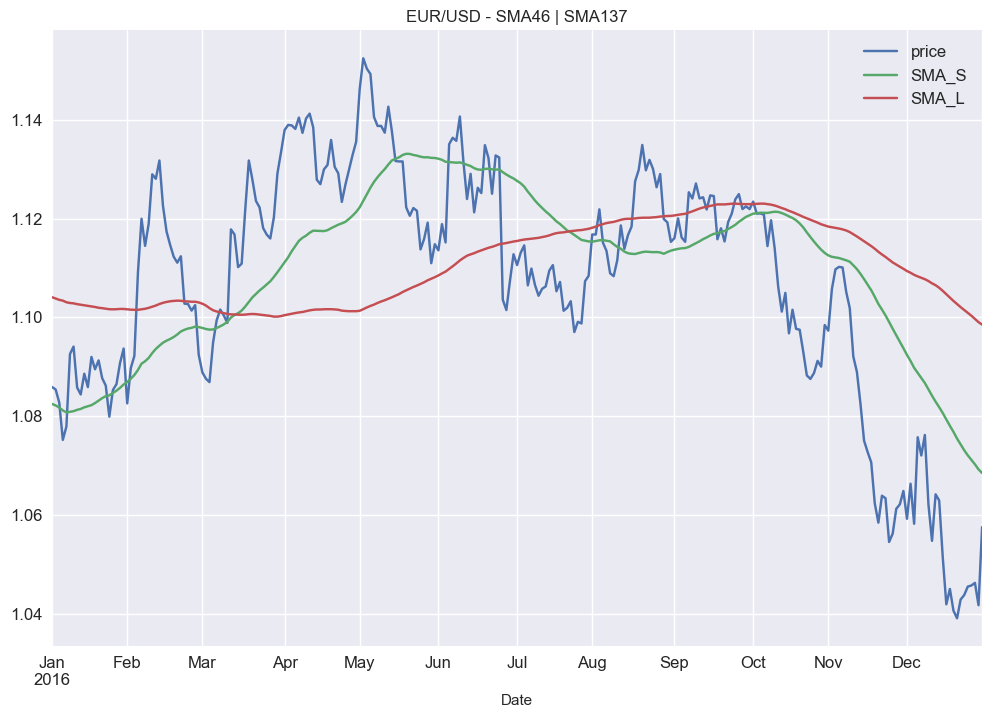

In [43]:
data.loc["2016"].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [44]:
data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1 )

In [45]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-07-09,1.241897,1.212185,1.227891,-1
2004-07-12,1.240803,1.213333,1.227764,-1
2004-07-13,1.233304,1.214392,1.227583,-1
2004-07-14,1.238497,1.215486,1.227362,-1
2004-07-15,1.235605,1.216466,1.227096,-1
...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1
2020-06-25,1.125087,1.103905,1.102737,1
2020-06-26,1.122208,1.104801,1.102788,1


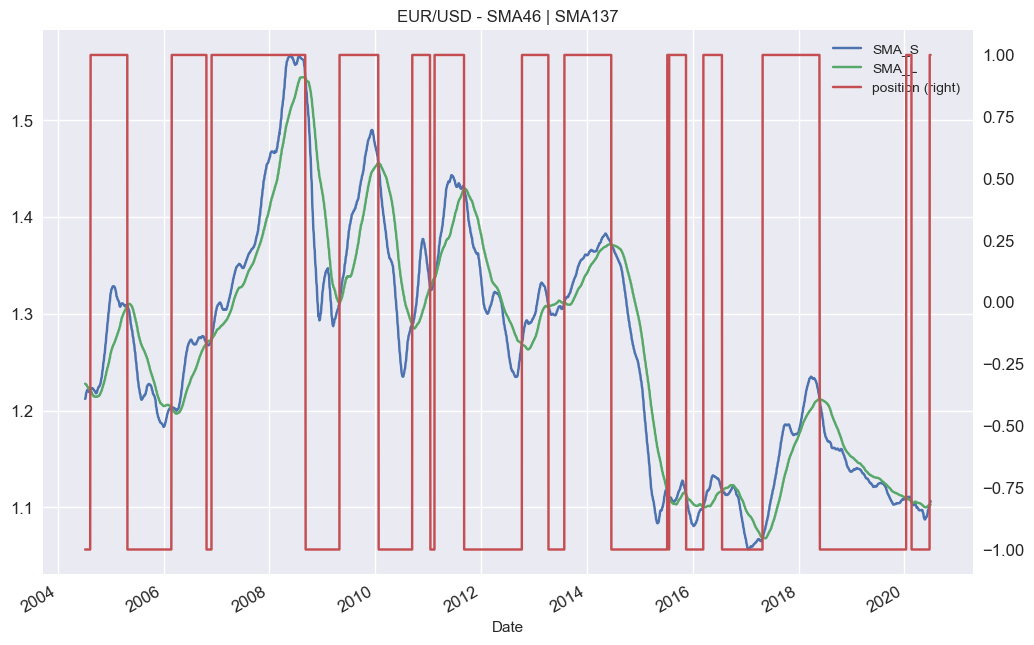

In [46]:
data.loc[:, ["SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

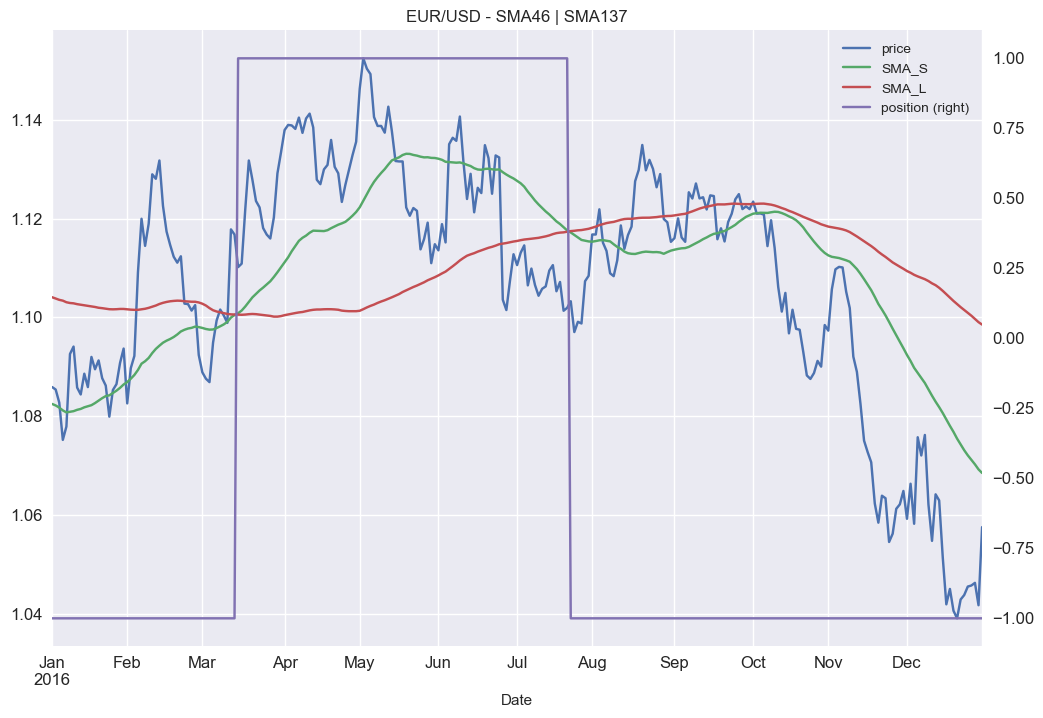

In [47]:
data.loc["2016", ["price","SMA_S", "SMA_L", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position",
                                                     title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l))
plt.show()

In [48]:
###############################################################################################################################

## Vectorized Strategy Backtesting

In [49]:
data

,price,SMA_S,SMA_L,position
Date,,,,
2004-07-09,1.241897,1.212185,1.227891,-1
2004-07-12,1.240803,1.213333,1.227764,-1
2004-07-13,1.233304,1.214392,1.227583,-1
2004-07-14,1.238497,1.215486,1.227362,-1
2004-07-15,1.235605,1.216466,1.227096,-1
...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1
2020-06-25,1.125087,1.103905,1.102737,1
2020-06-26,1.122208,1.104801,1.102788,1


In [50]:
data["returns"] = np.log(data.price.div(data.price.shift(1)))

In [51]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [52]:
data

,price,SMA_S,SMA_L,position,returns,strategy
Date,,,,,,
2004-07-09,1.241897,1.212185,1.227891,-1,NaN,NaN
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338
...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562


In [53]:
data.dropna(inplace = True)

In [54]:
data[["returns", "strategy"]].sum() # absolute performance

returns    -0.099105
strategy    0.926912
dtype: float64

In [55]:
data[["returns", "strategy"]].sum().apply(np.exp) # absolute performance

returns     0.905647
strategy    2.526694
dtype: float64

In [56]:
data[["returns", "strategy"]].mean() * 252 # annualized return

returns    -0.006035
strategy    0.056448
dtype: float64

In [57]:
data[["returns", "strategy"]].std() * np.sqrt(252) # annualized risk

returns     0.120418
strategy    0.120366
dtype: float64

In [58]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [59]:
data

,price,SMA_S,SMA_L,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,
2004-07-12,1.240803,1.213333,1.227764,-1,-0.000881,0.000881,0.999119,1.000882
2004-07-13,1.233304,1.214392,1.227583,-1,-0.006062,0.006062,0.993081,1.006967
2004-07-14,1.238497,1.215486,1.227362,-1,0.004202,-0.004202,0.997263,1.002745
2004-07-15,1.235605,1.216466,1.227096,-1,-0.002338,0.002338,0.994934,1.005092
2004-07-16,1.245594,1.217883,1.226961,-1,0.008051,-0.008051,1.002977,0.997032
...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,1.103047,1.102654,1,0.002892,-0.002892,0.910893,2.541328
2020-06-25,1.125087,1.103905,1.102737,1,-0.005449,-0.005449,0.905943,2.527519
2020-06-26,1.122208,1.104801,1.102788,1,-0.002562,-0.002562,0.903625,2.521051


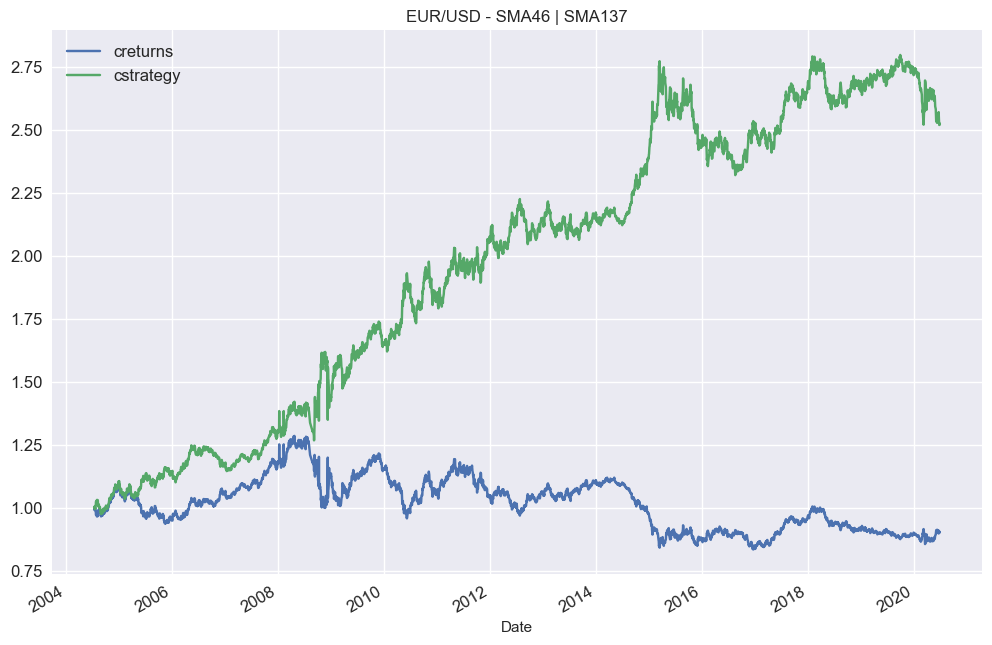

In [60]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [61]:
outperf = data.cstrategy.iloc[-1] - data.creturns.iloc[-1]
outperf

1.6210467811232663

## Finding the optimal SMA Strategy

In [62]:
df = pd.read_csv("eurusd.csv", parse_dates = ["Date"], index_col = "Date")

In [63]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [64]:
def test_strategy(SMA):
    data = df.copy()
    data["returns"] = np.log(data.price.div(data.price.shift(1)))
    data["SMA_S"] = data.price.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.price.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return np.exp(data["strategy"].sum())

In [65]:
test_strategy((50, 200))

1.2835003323288487

In [66]:
test_strategy((75, 150))

1.58974017632631

In [67]:
test_strategy((25, 252))

1.1755957408242586

In [68]:
SMA_S_range = range(10, 50, 1)
SMA_L_range = range(100, 252, 1)

In [69]:
SMA_S_range

range(10, 50)

In [70]:
from itertools import product

In [71]:
list(product(SMA_S_range, SMA_L_range))

[(10, 100),
 (10, 101),
 (10, 102),
 (10, 103),
 (10, 104),
 (10, 105),
 (10, 106),
 (10, 107),
 (10, 108),
 (10, 109),
 (10, 110),
 (10, 111),
 (10, 112),
 (10, 113),
 (10, 114),
 (10, 115),
 (10, 116),
 (10, 117),
 (10, 118),
 (10, 119),
 (10, 120),
 (10, 121),
 (10, 122),
 (10, 123),
 (10, 124),
 (10, 125),
 (10, 126),
 (10, 127),
 (10, 128),
 (10, 129),
 (10, 130),
 (10, 131),
 (10, 132),
 (10, 133),
 (10, 134),
 (10, 135),
 (10, 136),
 (10, 137),
 (10, 138),
 (10, 139),
 (10, 140),
 (10, 141),
 (10, 142),
 (10, 143),
 (10, 144),
 (10, 145),
 (10, 146),
 (10, 147),
 (10, 148),
 (10, 149),
 (10, 150),
 (10, 151),
 (10, 152),
 (10, 153),
 (10, 154),
 (10, 155),
 (10, 156),
 (10, 157),
 (10, 158),
 (10, 159),
 (10, 160),
 (10, 161),
 (10, 162),
 (10, 163),
 (10, 164),
 (10, 165),
 (10, 166),
 (10, 167),
 (10, 168),
 (10, 169),
 (10, 170),
 (10, 171),
 (10, 172),
 (10, 173),
 (10, 174),
 (10, 175),
 (10, 176),
 (10, 177),
 (10, 178),
 (10, 179),
 (10, 180),
 (10, 181),
 (10, 182),
 (10

In [72]:
combinations = list(product(SMA_S_range, SMA_L_range))

In [73]:
len(combinations)

6080

In [74]:
(50-10) * (252-100)

6080

In [75]:
results = []
for comb in combinations:
    results.append(test_strategy(comb))

In [76]:
results

[0.919639848594834,
 0.9017909001165385,
 0.9088514707606253,
 0.9172039081156574,
 0.9902316124249487,
 0.9839526868794093,
 1.0304555530676556,
 1.0580627844394732,
 1.0209474697557395,
 1.1225414594776157,
 1.1439396770251977,
 1.0928826062479924,
 1.158686928858328,
 1.1472509415077028,
 1.0535678507360313,
 1.0834788006764182,
 1.151663935854727,
 1.1505573494996577,
 1.1653183679562213,
 1.2167014670211942,
 1.2416587315963905,
 1.1667630873747963,
 1.2185865782849303,
 1.1718965787619908,
 1.1816366630339725,
 1.13721357858156,
 1.1858141820530623,
 1.266796025009642,
 1.2954797436418617,
 1.2487089215312812,
 1.2774725832850917,
 1.2815688488537094,
 1.315601386000957,
 1.3268193066021445,
 1.3746941118458667,
 1.3435175722121493,
 1.383038780593678,
 1.3973468547986456,
 1.3933923926338347,
 1.3202781031636979,
 1.3108447683042326,
 1.3519662172615805,
 1.2755744454123736,
 1.2512368246963703,
 1.1986108264031603,
 1.1860503041698052,
 1.2053044885749076,
 1.2413672239985285,


In [77]:
np.max(results)

2.5266939897810787

In [78]:
np.argmax(results)

5509

In [79]:
combinations[np.argmax(results)]

(46, 137)

In [80]:
many_results = pd.DataFrame(data = combinations, columns = ["SMA_S", "SMA_L"])
many_results

,SMA_S,SMA_L
0,10,100
1,10,101
2,10,102
3,10,103
4,10,104
...,...,...
6075,49,247
6076,49,248
6077,49,249
6078,49,250


In [81]:
many_results["performance"] = results

In [82]:
many_results

,SMA_S,SMA_L,performance
0,10,100,0.919640
1,10,101,0.901791
2,10,102,0.908851
3,10,103,0.917204
4,10,104,0.990232
...,...,...,...
6075,49,247,1.282403
6076,49,248,1.303129
6077,49,249,1.267525
6078,49,250,1.275176


In [83]:
many_results.nlargest(10, "performance")

,SMA_S,SMA_L,performance
5509,46,137,2.526694
5660,47,136,2.513588
5356,45,136,2.490511
5507,46,135,2.464982
4283,38,127,2.455225
5963,49,135,2.447218
5661,47,137,2.439993
5811,48,135,2.439185
5508,46,136,2.432296
4284,38,128,2.427431


In [84]:
many_results.nsmallest(10, "performance")

,SMA_S,SMA_L,performance
461,13,105,0.835621
310,12,106,0.837311
309,12,105,0.846303
159,11,107,0.849825
307,12,103,0.851647
308,12,104,0.852194
608,14,100,0.865872
306,12,102,0.871889
462,13,106,0.876600
458,13,102,0.876784


In [85]:
# (46, 137)

In [86]:
sma_s = 46
sma_l = 137

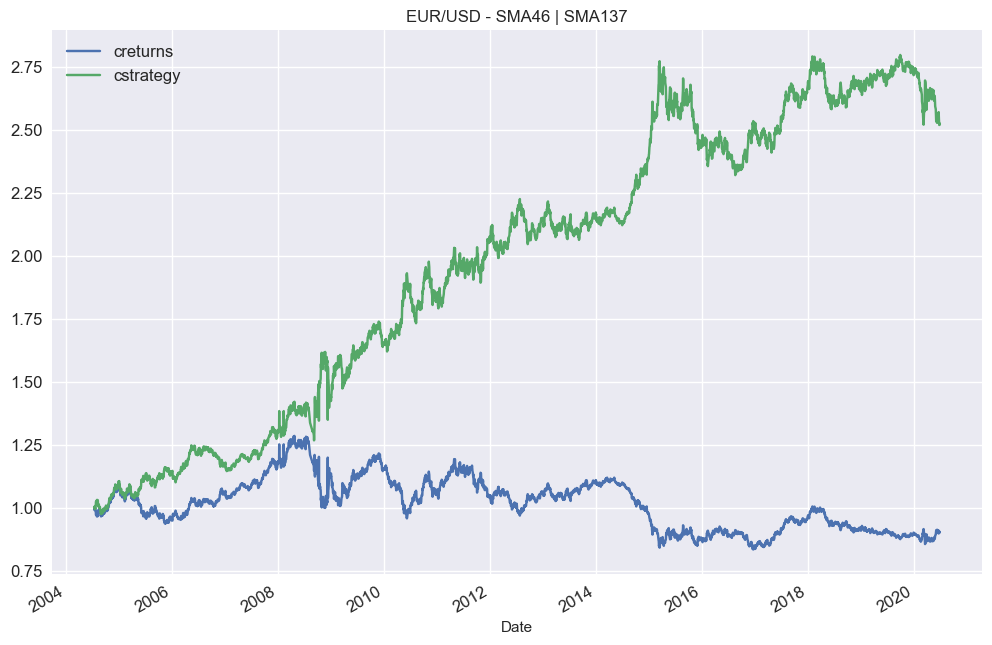

In [87]:
data[["creturns", "cstrategy"]].plot(figsize = (12, 8), title = "EUR/USD - SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()